### In SAM, Bounding box prompts from an object detector can enable text-to-object segmentation

#### 1. Using YOLOv8 for Object Detection and bounding box generation

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 11.7 MB/s eta 0:00:00


In [ ]:
# Custom training YOLO model using Custom Dataset

In [ ]:
# unzipping dataset
!cp "/content/MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip" "MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip"
!unzip "MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip"

cp: '/content/MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip' and 'MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip' are the same file
Archive:  MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/Y11_jpg.rf.a2927aa6c18c3e171759794c652f7a94.jpg  
 extracting: test/images/Y15_jpg.rf.ef14d75b886fd9ce299d12ffe480c5e9.jpg  
 extracting: test/images/Y16_JPG.rf.96e3fc38718c5f64776810040e63363c.jpg  
 extracting: test/images/Y25_jpg.rf.44dd79b8fc37ba37125a4aaded54ac7c.jpg  
 extracting: test/images/Y29_jpg.rf.307e980d22d7cea7aed340d4f0edc9bc.jpg  
 extracting: test/images/Y33_jpg.rf.f3e7bf77085ecd9dd6c9cfbc268b8fc0.jpg  
 extracting: test/images/Y35_jpg.rf.2708ac47796b51b380ca8f3cf8fcc821.jpg  
 extracting: test/images/Y49_JPG.rf.f5d86858ea33cd0f3b814c9705d731e5.jpg  
 extracting: test/images/Y53_j

In [ ]:
#Training YOLOv8 on a custom dataset
!yolo task = detect mode = train model = yolov8n.pt data = /content/data.yaml epochs = 200 imgsz= 650 project = /content/drive/MyDrive/Brain_Tumor/New_Results

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 5, in <module>
    from ultralytics.cfg import entrypoint
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/__init__.py", line 5, in <module>
    from ultralytics.hub import start
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/hub/__init__.py", line 5, in <module>
    from ultralytics.data.utils import HUBDatasetStats
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/__init__.py", line 3, in <module>
    from .base import BaseDataset
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/base.py", line 18, in <module>
    from ultralytics.utils import DEFAULT_CFG, LOCAL_RANK, LOGGER, NUM_THREADS, TQDM_BAR_FORMAT
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/utils/__init__.py", line 19, in <module>
    import matplotlib.pyplot as plt
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py", line 131, in <module>
    from . import _api, _versi

In [ ]:
 # Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/Brain_Tumor/New_Results/train2/weights/best.pt source = /content/test/images/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg  project = /content/drive/MyDrive/Brain_Tumor/New_Results

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/1 /content/test/images/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg: 672x672 1 YES-TUMOR, 15.4ms
Speed: 13.6ms preprocess, 15.4ms inference, 30.2ms postprocess per image at shape (1, 3, 672, 672)
Results saved to /content/drive/MyDrive/Brain_Tumor/New_Results/predict5


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

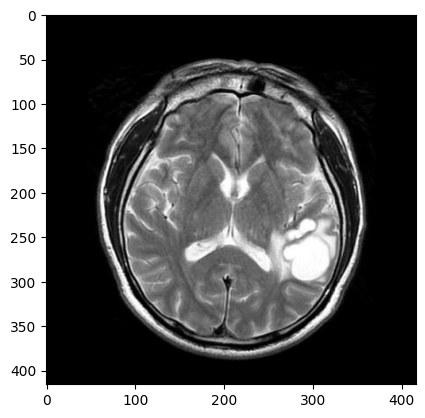

In [ ]:
# input image
original_image = cv2.imread('/content/test/images/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

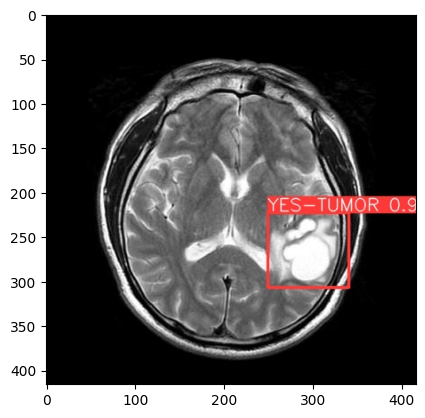

In [ ]:
# Plotting the predicted image along with confidence
predicted_image = cv2.imread('/content/drive/MyDrive/Brain_Tumor/New_Results/predict4/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg')
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))

In [ ]:
## loading the custom trained YOLOv8m model
model = YOLO('/content/drive/MyDrive/Brain_Tumor/New_Results/train2/weights/best.pt')
# Perform inference
results = model('/content/test/images/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg')
results


image 1/1 /content/test/images/Y90_jpg.rf.85255f00a6965b30d7b6caab53b655f3.jpg: 672x672 1 YES-TUMOR, 8.8ms
Speed: 3.9ms preprocess, 8.8ms inference, 2.5ms postprocess per image at shape (1, 3, 672, 672)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'YES-TUMOR'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0

In [ ]:
result = results[0]
result.boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[249.2085, 223.7642, 340.9882, 307.4851,   0.9123,   0.0000]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.9123], device='cuda:0')
data: tensor([[249.2085, 223.7642, 340.9882, 307.4851,   0.9123,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[295.0984, 265.6246,  91.7796,  83.7209]], device='cuda:0')
xywhn: tensor([[0.7094, 0.6385, 0.2206, 0.2013]], device='cuda:0')
xyxy: tensor([[249.2085, 223.7642, 340.9882, 307.4851]], device='cuda:0')
xyxyn: tensor([[0.5991, 0.5379, 0.8197, 0.7391]], device='cuda:0')

In [ ]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: YES-TUMOR
Coordinates: [249, 224, 341, 307]
Probability: 0.91
---


#### 2. Using SAM for segmentation

In [ ]:
# defining custom functions for mask generation (helper functions to visualize theresults of SAM)

In [ ]:
# link to funtions: https://github.com/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb

In [ ]:
# To make it easier for us to manage datasets, images and models we create a HOME constant.
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


##### Install Segment Anything Model (SAM) and other dependencies

In [ ]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-3g5j7oqw
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-3g5j7oqw
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36588 sha256=102fd2569013fc82382f9bfc2cdd3ce1db86012ce64b9afba0b63a58a938f814
  Stored in directory: /tmp/pip-ephem-wheel-cache-93xo_hy4/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [ ]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.1 MB/s eta 0:00:00


##### Download SAM weights

In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [ ]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [ ]:
!pip install supervision

In [ ]:
import supervision as sv

# Object masks from prompts with SAM
The Segment Anything Model (SAM) predicts object masks given prompts that indicate the desired object. The model first converts the image into an image embedding that allows high quality masks to be efficiently produced from a prompt.

## Generate Segmentation with Bounding Box

The `SamPredictor` class provides an easy interface to the model for prompting the model. It allows the user to first set an image using the `set_image` method, which calculates the necessary image embeddings. Then, prompts can be provided via the `predict` method to efficiently predict masks from those prompts. The model can take as input both point and box prompts, as well as masks from the previous iteration of prediction.

###### Here, we are going to provide bounding box as the prompt.

input_box [249 224 341 307]


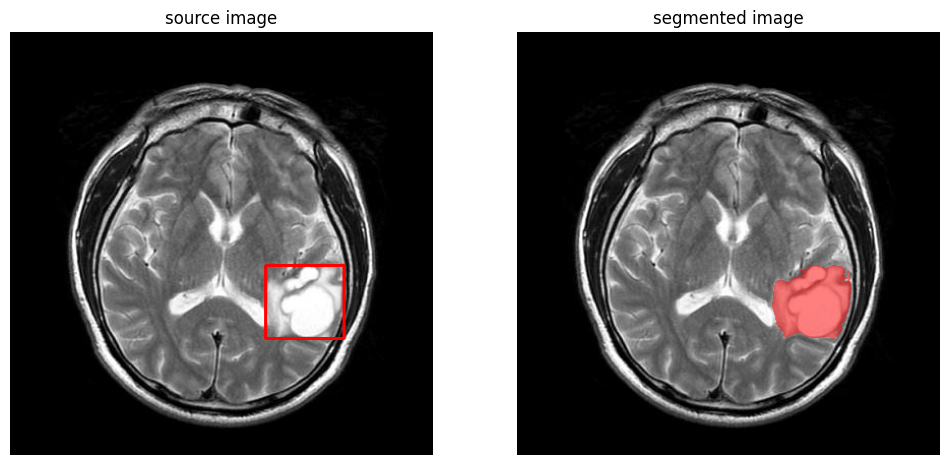

In [ ]:
for box in result.boxes:
  class_name = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  x1, y1, x2, y2 = cords


  input_box = np.array(cords)
  print("input_box",input_box)

#########################################################################
# SAM Model starts here. Giving box as a input to SAM
#########################################################################

  # Load Model
  import sys
  sys.path.append("..")
  from segment_anything import sam_model_registry, SamPredictor

  sam_checkpoint = "sam_vit_h_4b8939.pth"
  model_type = "vit_h"
  device = "cuda"

  # Creating sam model
  sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
  sam.to(device=device)

  mask_predictor = SamPredictor(sam)
  mask_predictor.set_image(original_image)

  # Generate masks with SAM
  # `SamPredictor.predict` method takes `np.ndarray` `box` argument in `[x_min, y_min, x_max, y_max]` format.

  masks, scores, logits = mask_predictor.predict(
      point_coords=None,
      point_labels=None,
      box=input_box,
      multimask_output=True,
      )

  # Results visualization with Supervision

  # initiate annotator
  box_annotator = sv.BoxAnnotator(color=sv.Color.red())
  mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

  detections = sv.Detections(
      xyxy=sv.mask_to_xyxy(masks=masks),
      mask=masks
  )
  detections = detections[detections.area == np.max(detections.area)]

  source_image = box_annotator.annotate(scene=original_image.copy(), detections=detections, skip_label=True)
  segmented_image = mask_annotator.annotate(scene=original_image.copy(), detections=detections)

  sv.plot_images_grid(
      images=[source_image, segmented_image],
      grid_size=(1, 2),
      titles=['source image', 'segmented image']
  )

Predict with SamPredictor.predict. The model returns masks, quality predictions for those masks, and low resolution mask logits that can be passed to the next iteration of prediction.


With multimask_output=True (the default setting), SAM outputs 3 masks, where scores gives the model's own estimation of the quality of these masks. This setting is intended for ambiguous input prompts, and helps the model disambiguate different objects consistent with the prompt. When False, it will return a single mask. For ambiguous prompts such as a single point, it is recommended to use multimask_output=True even if only a single mask is desired; the best single mask can be chosen by picking the one with the highest score returned in scores. This will often result in a better mask.

In [ ]:
masks.shape    # no.of masks

(3, 416, 416)

In [ ]:
scores

array([    0.93986,     0.94575,      0.9122], dtype=float32)

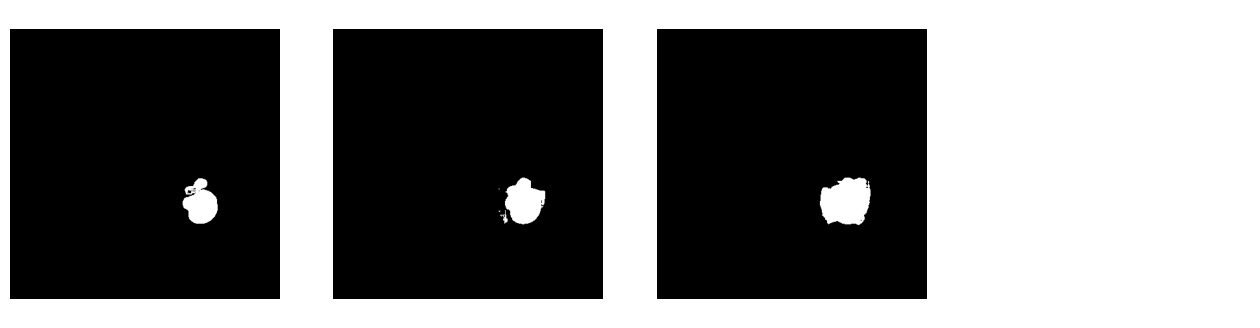

In [ ]:
sv.plot_images_grid(
    images=masks,
    grid_size=(1, 4),
    size=(16, 4)
)